In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing as pp
from scipy import stats
from scipy.stats import norm

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras import Sequential

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# reading CSV files
train_df = pd.read_csv('data.csv')
test_df = pd.read_csv('test.csv')
combine = [train_df, test_df]

In [0]:
train_df.head()

,Unnamed: 0,Episode,Station,Channel Type,Season,Year,Date,Day of week,Start_time,End_time,Length,Name of show,Name of episode,Genre,First time or rerun,# of episode in the season,Movie?,Game of the Canadiens during episode?,Market Share_total,Temperature in Montreal during episode
0,1,Vidéoclips V,V Total,General Channel,Fall,2016,2016-08-29,Monday,2016-08-29 06:00:00,2016-08-29 08:00:00,8,Vidéoclips V,NaN,Music Video Clips,No,Yes,No,No,0.9,20.400
1,2,Apollo dans l'frigo,V Total,General Channel,Fall,2016,2016-08-29,Monday,2016-08-29 08:00:00,2016-08-29 08:30:00,2,Apollo dans l'frigo,NaN,Informal Education and Recreation and Leisure,No,Yes,No,No,0.5,19.125
2,3,Infopublicité,V Total,General Channel,Fall,2016,2016-08-29,Monday,2016-08-29 08:30:00,2016-08-29 09:00:00,2,Infopublicité,NaN,"Infomercials, Promotional and Corporate Videos",No,Yes,No,No,0.3,19.125
3,4,"Infos, Les",V Total,General Channel,Fall,2016,2016-08-29,Monday,2016-08-29 09:00:00,2016-08-29 10:00:00,4,"Infos, Les",NaN,News,No,Yes,No,No,1.7,18.125
4,5,"Souper presque parfait, Un",V Total,General Channel,Fall,2016,2016-08-29,Monday,2016-08-29 10:00:00,2016-08-29 10:30:00,2,"Souper presque parfait, Un",NaN,Reality Programs,No,Yes,No,No,2.2,18.250


In [0]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 616656 entries, 0 to 616655
Data columns (total 20 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Unnamed: 0                              616656 non-null  int64  
 1   Episode                                 616656 non-null  object 
 2   Station                                 616656 non-null  object 
 3   Channel Type                            616656 non-null  object 
 4   Season                                  616656 non-null  object 
 5   Year                                    616656 non-null  int64  
 6   Date                                    616656 non-null  object 
 7   Day of week                             616656 non-null  object 
 8   Start_time                              616613 non-null  object 
 9   End_time                                616613 non-null  object 
 10  Length                                  6166

In [0]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154165 entries, 0 to 154164
Data columns (total 19 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Unnamed: 0                              154165 non-null  int64  
 1   Episode                                 154165 non-null  object 
 2   Station                                 154165 non-null  object 
 3   Channel Type                            154165 non-null  object 
 4   Season                                  154165 non-null  object 
 5   Year                                    154165 non-null  int64  
 6   Date                                    154165 non-null  object 
 7   Day of week                             154165 non-null  object 
 8   Start_time                              154143 non-null  object 
 9   End_time                                154143 non-null  object 
 10  Length                                  1541

In [0]:
# finding null values
total = train_df.isnull().sum().sort_values(ascending=False)
percent = (train_df.isnull().sum()/train_df.isnull().count()*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.index.name ='Features'
missing_data.head(5)

,Total,Percent
Features,,
Name of episode,222579,36.094516
Temperature in Montreal during episode,83344,13.515477
Start_time,43,0.006973
End_time,43,0.006973
# of episode in the season,0,0.000000


In [0]:
# droping unnamed column and columns with null values
train_df1=train_df.drop(columns=["Unnamed: 0","Episode", "Date","Start_time","End_time","Name of episode","Temperature in Montreal during episode"])
test_df1=test_df.drop(columns=["Unnamed: 0","Episode", "Date","Start_time","End_time","Name of episode","Temperature in Montreal during episode"])

In [0]:
train_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 616656 entries, 0 to 616655
Data columns (total 13 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   Station                                616656 non-null  object 
 1   Channel Type                           616656 non-null  object 
 2   Season                                 616656 non-null  object 
 3   Year                                   616656 non-null  int64  
 4   Day of week                            616656 non-null  object 
 5   Length                                 616656 non-null  int64  
 6   Name of show                           616656 non-null  object 
 7   Genre                                  616656 non-null  object 
 8   First time or rerun                    616656 non-null  object 
 9   # of episode in the season             616656 non-null  object 
 10  Movie?                                 616656 non-null  

In [0]:
test_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154165 entries, 0 to 154164
Data columns (total 12 columns):
 #   Column                                 Non-Null Count   Dtype 
---  ------                                 --------------   ----- 
 0   Station                                154165 non-null  object
 1   Channel Type                           154165 non-null  object
 2   Season                                 154165 non-null  object
 3   Year                                   154165 non-null  int64 
 4   Day of week                            154165 non-null  object
 5   Length                                 154165 non-null  int64 
 6   Name of show                           154165 non-null  object
 7   Genre                                  154165 non-null  object
 8   First time or rerun                    154165 non-null  object
 9   # of episode in the season             154165 non-null  object
 10  Movie?                                 154165 non-null  object
 11  

In [0]:
# finding columns with nonnumeric values 
nonnumeric_feats_train = train_df1.select_dtypes(exclude=['int64', 'float64'])
nonnumeric_feats_train.columns

Index(['Station', 'Channel Type', 'Season', 'Day of week', 'Name of show',
       'Genre', 'First time or rerun', '# of episode in the season', 'Movie?',
       'Game of the Canadiens during episode?'],
      dtype='object')

In [0]:
nonnumeric_feats_test = test_df1.select_dtypes(exclude=['int64', 'float64'])
nonnumeric_feats_test.columns

Index(['Station', 'Channel Type', 'Season', 'Day of week', 'Name of show',
       'Genre', 'First time or rerun', '# of episode in the season', 'Movie?',
       'Game of the Canadiens during episode?'],
      dtype='object')

In [0]:
# factorizing columns with nonnumeric values
for col in nonnumeric_feats_train.columns:
    train_df1[col] = pd.factorize(train_df1[col])[0]
    
for col in nonnumeric_feats_test.columns:
    test_df1[col] = pd.factorize(test_df1[col])[0]    
    

train_df1.tail()


,Station,Channel Type,Season,Year,Day of week,Length,Name of show,Genre,First time or rerun,# of episode in the season,Movie?,Game of the Canadiens during episode?,Market Share_total
616651,19,1,1,2019,1,2,1275,6,0,0,0,0,0.0
616652,19,1,1,2019,1,2,2579,6,0,0,0,0,1.1
616653,19,1,1,2019,1,4,6604,21,0,0,0,0,0.3
616654,19,1,1,2019,1,4,6604,21,0,0,0,0,0.4
616655,19,1,1,2019,1,2,6589,21,0,0,0,0,1.6


In [0]:
# finding the correlation between Market Share_total and other columns
corolation=train_df1.corr()
corolation["Market Share_total"].sort_values(ascending = False)

Market Share_total                       1.000000
Movie?                                   0.025719
Length                                   0.008794
First time or rerun                      0.002339
Game of the Canadiens during episode?   -0.004704
Season                                  -0.006222
Year                                    -0.019339
Day of week                             -0.022038
# of episode in the season              -0.056575
Name of show                            -0.081997
Genre                                   -0.089270
Station                                 -0.388944
Channel Type                            -0.572825
Name: Market Share_total, dtype: float64

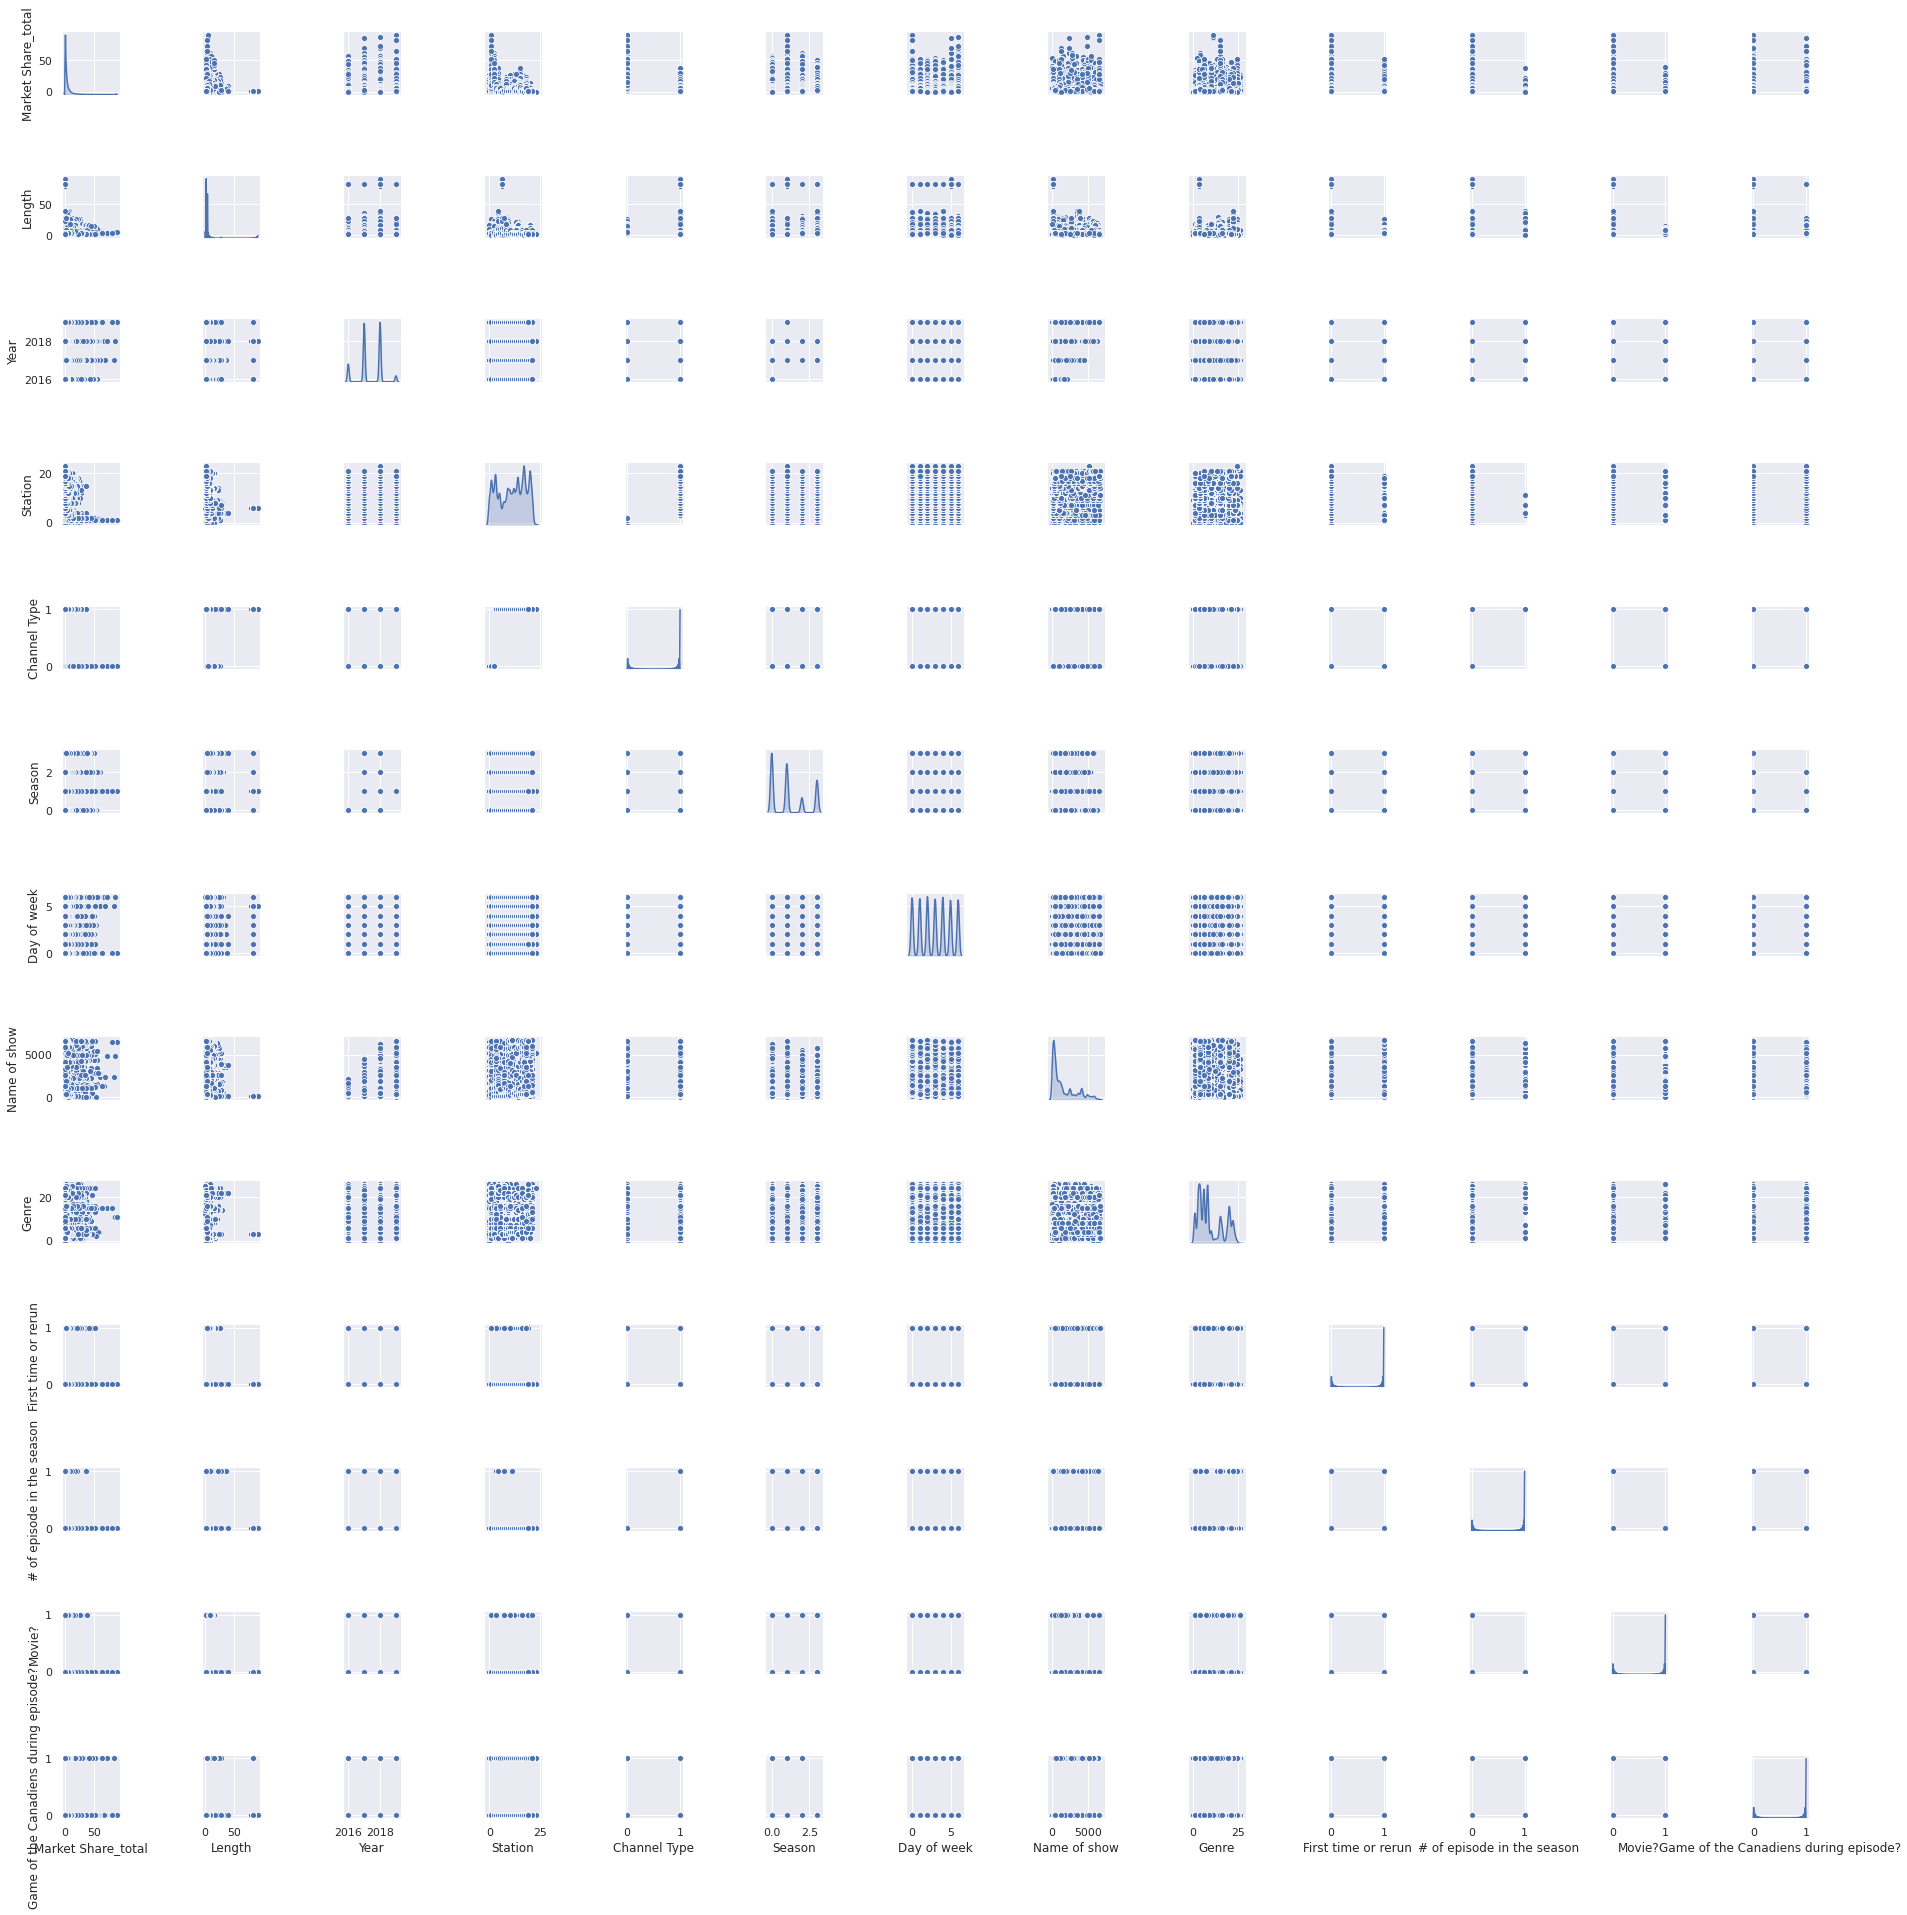

In [0]:
# plotting
sns.set()
columns = ['Market Share_total','Length','Year','Station', 'Channel Type', 'Season', 'Day of week', 'Name of show','Genre', 'First time or rerun', '# of episode in the season', 'Movie?','Game of the Canadiens during episode?']
sns.pairplot(train_df1[columns],size = 2 ,kind ='scatter',diag_kind='kde')
plt.show()

In [0]:
# # droping the least correlated columns to Market Share_total
# train_df1=train_df1.drop(columns=["Length","Year", "Season","Day of week","Name of show","Genre","First time or rerun", "# of episode in the season", "Movie?", "Game of the Canadiens during episode?"])
# train_df1.head()

In [0]:
# test_df1=test_df1.drop(columns=["Length","Year", "Season","Day of week","Name of show","Genre","First time or rerun", "# of episode in the season", "Movie?", "Game of the Canadiens during episode?"])
# test_df1.head()

In [0]:
# splitting train and test
X_train, X_test, Y_train, Y_test=train_test_split(train_df1,train_df1.pop("Market Share_total"),test_size=0.15, random_state=43)


In [0]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 524157 entries, 84325 to 276292
Data columns (total 12 columns):
 #   Column                                 Non-Null Count   Dtype
---  ------                                 --------------   -----
 0   Station                                524157 non-null  int64
 1   Channel Type                           524157 non-null  int64
 2   Season                                 524157 non-null  int64
 3   Year                                   524157 non-null  int64
 4   Day of week                            524157 non-null  int64
 5   Length                                 524157 non-null  int64
 6   Name of show                           524157 non-null  int64
 7   Genre                                  524157 non-null  int64
 8   First time or rerun                    524157 non-null  int64
 9   # of episode in the season             524157 non-null  int64
 10  Movie?                                 524157 non-null  int64
 11  Game of t

In [0]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92499 entries, 103253 to 127954
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype
---  ------                                 --------------  -----
 0   Station                                92499 non-null  int64
 1   Channel Type                           92499 non-null  int64
 2   Season                                 92499 non-null  int64
 3   Year                                   92499 non-null  int64
 4   Day of week                            92499 non-null  int64
 5   Length                                 92499 non-null  int64
 6   Name of show                           92499 non-null  int64
 7   Genre                                  92499 non-null  int64
 8   First time or rerun                    92499 non-null  int64
 9   # of episode in the season             92499 non-null  int64
 10  Movie?                                 92499 non-null  int64
 11  Game of the Canadiens 

In [0]:
# LinearRegression
linreg = LinearRegression()
model_linreg = linreg.fit(X_train, Y_train)
lin_pred = linreg.predict(X_test)
r2_lin = r2_score(Y_test, lin_pred)
rmse_lin = np.sqrt(mean_squared_error(Y_test, lin_pred))
print("Score: "+ str(model_linreg.score(X_test,Y_test)))
print("R^2 Score: " + str(r2_lin))
print("RMSE Score: " + str(rmse_lin))

Score: 0.33882293671790076
R^2 Score: 0.33882293671790076
RMSE Score: 3.9840316027234364


In [0]:
# Lasso
lasso = Lasso()
model_lasso = lasso.fit(X_train, Y_train)
lasso_pred = lasso.predict(X_test)
r2_lasso = r2_score(Y_test, lasso_pred)
rmse_lasso = np.sqrt(mean_squared_error(Y_test, lasso_pred))
print("Score: " + str(model_lasso.score(X_test,Y_test)))
print("R^2 Score: " + str(r2_lasso))
print("RMSE Score: " + str(rmse_lasso))

Score: 0.15885847139352804
R^2 Score: 0.15885847139352804
RMSE Score: 4.493641511678857


In [0]:
# Ridge
ridge = Ridge()
model_ridge = ridge.fit(X_train, Y_train)
ridge_pred = ridge.predict(X_test)
r2_ridge = r2_score(Y_test, ridge_pred)
rmse_ridge = np.sqrt(mean_squared_error(Y_test, ridge_pred))
print("Score: " + str(model_ridge.score(X_test,Y_test)))
print("R^2 Score: " + str(r2_ridge))
print("RMSE Score: " + str(rmse_ridge))

Score: 0.33882299273432437
R^2 Score: 0.33882299273432437
RMSE Score: 3.9840314339553267


In [0]:
# DecisionTreeRegressor
dtr = DecisionTreeRegressor()
model_dtr = dtr.fit(X_train, Y_train)
dtr_pred = dtr.predict(X_test)
r2_dtr = r2_score(Y_test, dtr_pred)
rmse_dtr = np.sqrt(mean_squared_error(Y_test, dtr_pred))
print("Best Score: " + str(model_dtr.score(X_test,Y_test)))
print("R^2 Score: " + str(r2_dtr))
print("RMSE Score: " + str(rmse_dtr))

Best Score: 0.8382855914718568
R^2 Score: 0.8382855914718568
RMSE Score: 1.9703267043525994


In [0]:
# RandomForestRegressor
rf = RandomForestRegressor()
model_rf = rf.fit(X_train, Y_train)
rf_pred = rf.predict(X_test)
r2_rf = r2_score(Y_test, rf_pred)
rmse_rf = np.sqrt(mean_squared_error(Y_test, rf_pred))
print("Best Score: " + str(model_rf.score(X_test,Y_test)))
print("RMSE Score: " + str(rmse_rf))
print("R^2 Score: " + str(r2_rf))
print("RMSE Score: " + str(rmse_rf))

Best Score: 0.8526646352796552
RMSE Score: 1.8806907408345566
R^2 Score: 0.8526646352796552
RMSE Score: 1.8806907408345566


In [0]:
# evaluating performances of the models
model_performances = pd.DataFrame({
    "Model" : ["Linear Regression", "Ridge", "Lasso", "Decision Tree Regressor", "Random Forest Regressor"],
    "Score" : [model_linreg.score(X_test,Y_test), model_ridge.score(X_test,Y_test),  model_lasso.score(X_test,Y_test), model_dtr.score(X_test,Y_test), model_rf.score(X_test,Y_test)],
    "R Squared" : [str(r2_lin)[0:5], str(r2_ridge)[0:5], str(r2_lasso)[0:5], str(r2_dtr)[0:5], str(r2_rf)[0:5]],
    "RMSE" : [str(rmse_lin)[0:8], str(rmse_ridge)[0:8], str(rmse_lasso)[0:8], str(rmse_dtr)[0:8], str(rmse_rf)[0:8]]
})
model_performances.round(4)

print("Sorted by Score:")
model_performances.sort_values(by="Score", ascending=False)

Sorted by Score:


,Model,Score,R Squared,RMSE
4,Random Forest Regressor,0.852665,0.852,1.880690
3,Decision Tree Regressor,0.838286,0.838,1.970326
1,Ridge,0.338823,0.338,3.984031
0,Linear Regression,0.338823,0.338,3.984031
2,Lasso,0.158858,0.158,4.493641


In [0]:
# predicting with the optimal model
rf = RandomForestRegressor()
model_rf = rf.fit(X_train, Y_train)
rf_pred = rf.predict(X_test)
rf_pred.shape

(92499,)

In [0]:
# extracting CSV file from the prediction
submission = pd.DataFrame({
        'Market Share_total': test_df["Unnamed: 0"],
        "Market Share_total": rf_pred
    })
submission.to_csv('submission.csv', index=False)


In [0]:
# Neural Network model
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1664      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 166,529
Trainable params: 166,529
Non-trainable params: 0
_________________________________________________________________


In [0]:
NN_model.fit(X_train,Y_train, epochs=10, batch_size=32, validation_split = 0.2)

Epoch 1/10
13104/13104 [==============================] - 32s 2ms/step - loss: 2.1536 - mean_absolute_error: 2.1535 - val_loss: 1.9829 - val_mean_absolute_error: 1.9829
Epoch 2/10
13104/13104 [==============================] - 32s 2ms/step - loss: 1.9403 - mean_absolute_error: 1.9403 - val_loss: 1.9971 - val_mean_absolute_error: 1.9971
Epoch 3/10
13104/13104 [==============================] - 32s 2ms/step - loss: 1.8556 - mean_absolute_error: 1.8556 - val_loss: 1.9510 - val_mean_absolute_error: 1.9510
Epoch 4/10
13104/13104 [==============================] - 32s 2ms/step - loss: 1.7846 - mean_absolute_error: 1.7846 - val_loss: 1.6796 - val_mean_absolute_error: 1.6796
Epoch 5/10
13104/13104 [==============================] - 32s 2ms/step - loss: 1.6926 - mean_absolute_error: 1.6926 - val_loss: 1.6615 - val_mean_absolute_error: 1.6615
Epoch 6/10
13104/13104 [==============================] - 32s 2ms/step - loss: 1.6725 - mean_absolute_error: 1.6725 - val_loss: 1.6332 - val_mean_absolute_

In [0]:
# predictng with neural network model
prediction=NN_model.predict(X_test)

In [0]:
# extracting CSV file from the prediction
submission_NN = pd.DataFrame({
        'Market Share_total': test_df["Unnamed: 0"],
        "Market Share_total": rf_pred
    })
submission.to_csv('submission_NN.csv', index=False)